In [17]:
#Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder
# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
# Algorithm
from sklearn import svm
from sklearn.model_selection import KFold
# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

In [18]:
df = pd.read_csv('C:/Users/NelsonTsai/Desktop/ML_hw3/DATA_test.csv')
df

,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_None,Systemic_Illness_Swollen Lymph Nodes,Rectal_Pain_F,Rectal_Pain_T,Sore_Throat_F,Sore_Throat_T,Penile_Oedema_F,Penile_Oedema_T,...,HIV_Infection_F,HIV_Infection_T,Solitary_Lesion_F,Solitary_Lesion_T,Swollen_Tonsils_F,Swollen_Tonsils_T,Sexually_Transmitted_Infection_F,Sexually_Transmitted_Infection_T,MonkeyPox_Negative,MonkeyPox_Positive
0,0,0,1,0,1,0,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
1,1,0,0,0,0,1,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
3,0,0,1,0,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,0,0,0,1,0,1,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,1,0,0,1,0,1,1,0,...,1,0,0,1,1,0,0,1,0,1
24996,1,0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
24997,0,0,1,0,0,1,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
24998,0,0,0,1,1,0,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0


In [19]:
x=df.drop(['MonkeyPox_Negative','MonkeyPox_Positive'],axis=1).copy()
x.head()

,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_None,Systemic_Illness_Swollen Lymph Nodes,Rectal_Pain_F,Rectal_Pain_T,Sore_Throat_F,Sore_Throat_T,Penile_Oedema_F,Penile_Oedema_T,Oral_Lesions_F,Oral_Lesions_T,HIV_Infection_F,HIV_Infection_T,Solitary_Lesion_F,Solitary_Lesion_T,Swollen_Tonsils_F,Swollen_Tonsils_T,Sexually_Transmitted_Infection_F,Sexually_Transmitted_Infection_T
0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0
1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0
2,1,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
3,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
4,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0


In [20]:
y=df['MonkeyPox_Positive'].copy()
y.head()

0    0
1    1
2    1
3    1
4    1
Name: MonkeyPox_Positive, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)
svm_c = [1,5,10]
svm_gamma = [0.01,0.05,0.1]
# 5.2 Manually peforming hyper parameter tuning
#cv=5分成5組
for i in svm_c:
    for j in svm_gamma:
            rbfModel=svm.SVC(kernel='rbf',C=i,gamma=j, random_state=4)
            rbfModel.fit(x_train,y_train)
            CV5F_cart_acc=cross_val_score(rbfModel,x_train,y_train,cv=3,scoring='accuracy')
            print('Training result')
            print('Each fold ACC:',CV5F_cart_acc)
            print('Average ACC:',round((np.mean(CV5F_cart_acc))*100,2),'+/-',round((np.std(CV5F_cart_acc))*100,2))
            print('+-----------------------------------------+')

Training result
Each fold ACC: [0.69176541 0.68576571 0.68706871]
Average ACC: 68.82 +/- 0.26
+-----------------------------------------+
Training result
Each fold ACC: [0.69116544 0.69311534 0.6920192 ]
Average ACC: 69.21 +/- 0.08
+-----------------------------------------+
Training result
Each fold ACC: [0.69041548 0.69056547 0.68811881]
Average ACC: 68.97 +/- 0.11
+-----------------------------------------+
Training result
Each fold ACC: [0.68906555 0.69176541 0.68781878]
Average ACC: 68.95 +/- 0.16
+-----------------------------------------+
Training result
Each fold ACC: [0.69176541 0.69086546 0.68751875]
Average ACC: 69.0 +/- 0.18
+-----------------------------------------+
Training result
Each fold ACC: [0.68696565 0.68846558 0.68751875]
Average ACC: 68.76 +/- 0.06
+-----------------------------------------+
Training result
Each fold ACC: [0.69071546 0.6959652  0.68946895]
Average ACC: 69.2 +/- 0.28
+-----------------------------------------+
Training result
Each fold ACC: [0.68

Training result:
Training ACC: 69.37
Training f1s: 78.79
Training pre: 70.31
Training sen: 89.59
Training spe: 34.18

Training confusion matrix:
[[ 2495  4804]
 [ 1322 11379]]


C:\Users\NelsonTsai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


+-----------------------------------------+
Testing result:
Testing ACC: 69.0
Testing f1s: 78.67
Testing pre: 70.43
Testing sen: 89.09
Testing spe: 33.04

Testing confusion matrix:
[[ 592 1200]
 [ 350 2858]]


C:\Users\NelsonTsai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


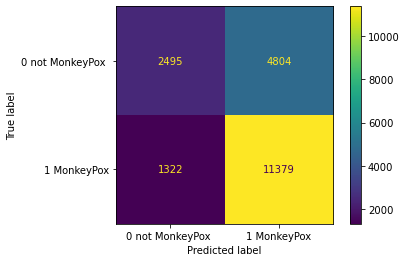

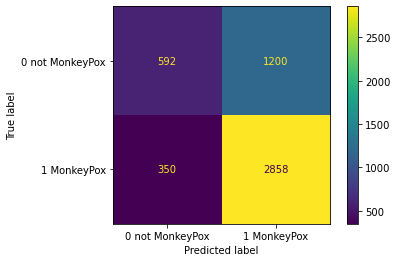

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
rbfModel=svm.SVC(kernel='rbf',C=10,gamma=0.01,probability=True, random_state=4)
rbfModel.fit(x_train,y_train)
#4.2 Show result: out-of-sample testing
# Training result
training_prediction=rbfModel.predict(x_train)
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=recall_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=recall_score(y_train,training_prediction,pos_label=0)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=rbfModel.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=recall_score(y_test,testing_prediction,pos_label=1)
testing_spe=recall_score(y_test,testing_prediction,pos_label=0)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print(plot_confusion_matrix(rbfModel,x_train,y_train,display_labels=["0 not MonkeyPox ","1 MonkeyPox"]))
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)
print(plot_confusion_matrix(rbfModel,x_test,y_test,display_labels=["0 not MonkeyPox","1 MonkeyPox"]))

In [13]:
prediction=rbfModel.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [14]:
proba=rbfModel.predict_proba(x_test)[:, 1]
proba

array([0.19426848, 0.73048306, 0.73057252, ..., 0.73045268, 0.42131968,
       0.4222149 ])

In [15]:
auc_value = roc_auc_score(y_test, proba)
print('AUC:',round(auc_value,2))

AUC: 0.68


C:\Users\NelsonTsai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


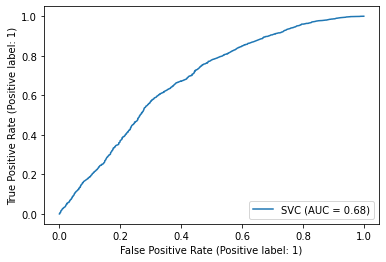

In [16]:
roc_fig=plot_roc_curve(rbfModel, x_test, y_test)